# Random Forest Models

Classifying Parkinsons Disease with Random Forests


In [ ]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import clone


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
## Prepare the Data Here, 
## Make sure to get a train and test set,
## And one hot encode the categorical variables
forest = pd.read_csv("Imputed_ALLdata_Ivan-Copy1.csv")

forest['target'] = -99

forest.loc[forest.Parkinsons == 0,'target'] = 0
forest.loc[forest.Parkinsons == 1,'target'] = 1

#X = forest[["age","sex","trestbps","chol","fbs",
#             "thalach","oldpeak","slope","ca"]].copy()

X = forest.iloc[:,0:100]
y = forest ['target'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y)

In [ ]:
## Use these to compute your accuracy, precision, and recall

## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

In [ ]:
#Checking the var names
dir(forest)

In [34]:
## Perform cross-validation to find the optimal
## max_depth for one of the three performance measures


kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

#Selecting original keystroke data
keep_cols = ["LLHold", "LLLatency","LRHold", "LRLatency", "LSHold", "LSLatency", 
             "RLHold", "RLLatency", "RRHold", "RRLatency", "LHold","LLatency", "RHold", "RLatency"]



X_train_copy = X_train[keep_cols].copy()

# used previous example's n (max_depth)=20
n = 20

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    print(j)
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train)
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


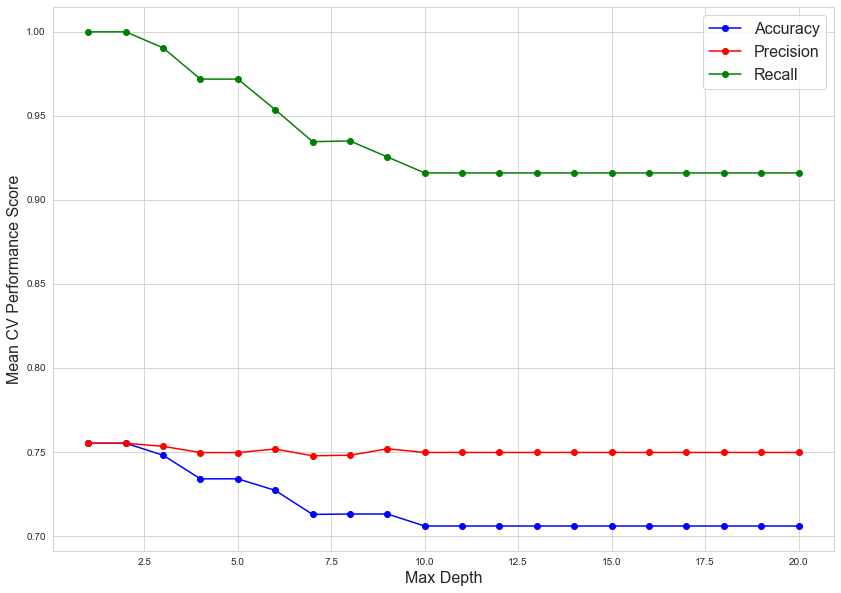

In [35]:
## Plot the mean cv measure against max_depth

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

## Using Random Forests for Feature Extraction

--Identifying which features in the PD data are important when determining the class. 

**The `sklearn` algorithm measures importance in the following way. For each feature it looks at every tree and identifies the nodes using that feature to make a cut. It then measures how much those cuts reduced impurity and averages that value over all the trees in the forest. After getting the average impurity reduction for each feature, `sklearn` scales the results so that the sum of all feature importances is equal to $1$.


In [36]:
forest_clf = RandomForestClassifier(n_estimators=500,max_depth = 3)

forest_clf.fit(X_train_copy, y_train)

RandomForestClassifier(max_depth=3, n_estimators=500)

In [37]:
forest_clf.feature_importances_

array([0.07186611, 0.07305592, 0.07592559, 0.06230636, 0.07816117,
       0.07347559, 0.05145557, 0.06417161, 0.08086061, 0.06405194,
       0.06955229, 0.09629406, 0.06496979, 0.07385341])

In [38]:
## Feature Importance
# This snippet of code makes a feature importance dataframe
# then it displays it in order of decreasing importance
##This feature of random forests allows us to understand what variables are most important,
   # which can help us explain the algorithm. It is also useful if you need to perform feature selection.
    
names = []
scores = []
for name, score in zip(X_train_copy.columns,forest_clf.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False)





,feature,importance_score
11,LLatency,0.0963
8,RRHold,0.0809
4,LSHold,0.0782
2,LRHold,0.0759
13,RLatency,0.0739
5,LSLatency,0.0735
1,LLLatency,0.0731
0,LLHold,0.0719
10,LHold,0.0696
12,RHold,0.0650


In [ ]:
#End of most relevant analysis...

**WIll PROBABLY REMOVE**

## Extra-Trees

An extension of random forests is know as extra-trees. This algorithm is just like a random forest, but in addition to randomly selecting a handful of features to optimize it also randomly selects the cutpoints instead of having the tree search for the optimal one.

This algorithm is faster random forests, but does tend to have a little more bias. Typically you'll have to build both classifiers and compare measures via cross-validation to decide if an extra-trees classifier is better than a standard random forest.

This algorithm can be enacted using `ExtraTreesClassifier` from `sklearn`.

## Random Forest Probability

Remember that another measure of algorithm "goodness" is the AUC score, but to calculate it you need some kind of score that can be thresholded to determine the classification. For the random forest classifier in sklearn you can get class probabilities like so.

In [ ]:
# The first column is probability of being class 0
# the second is probability of being class 1
forest_clf.predict_proba(X_train_copy)

In [ ]:
####Continue to compare to decision tree?

####CODE BELOW UNCHANGED FROM CLASS EXAMPLE

In [ ]:
## Compare it to the Decision Tree class

## Import the DecisionTreeClassifier here
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## Perform the Decision Tree cross validation here

## Sample Answer
# make an empty array that will hold all of our accuracy measures
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

keep_cols = ["age","sex","trestbps","chol","fbs",
             "thalach","oldpeak","slope","ca"]


X_train_copy = X_train[keep_cols].copy()

# n will be the maximum max_depth I consider
n = 20

tree_accs = np.zeros((5,n))
tree_precs = np.zeros((5,n))
tree_recs = np.zeros((5,n))

for j in range(1,n+1):
    tree = DecisionTreeClassifier(max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        tree_clone = clone(tree)
        tree_clone.fit(X_train_train,y_train_train)
        
        y_predict = tree_clone.predict(X_train_test)
        tree_accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        tree_precs[i,j-1] = precision_score(y_train_test,y_predict)
        tree_recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

In [ ]:
## Plot the random forest and decision tree in the sample plot here

## Sample Answer

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Random Forest Accuracy")
plt.plot(range(1,n+1), np.mean(tree_accs,axis=0),'b--o', label="Decision Tree Accuracy")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Random Forest Precision")
plt.plot(range(1,n+1), np.mean(tree_precs,axis=0),'r--o', label="Decision Tree Precision")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()


plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Random Forest Recall")
plt.plot(range(1,n+1), np.mean(tree_recs,axis=0),'g--o', label="Decision Tree Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()












This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2021.

Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)